In [91]:
import flax
from jax import numpy as jnp
import jax
import matplotlib.pyplot as plt


In [92]:
@jax.jit
def soft_plus(x: float):
    return jnp.log1p(jnp.exp(x))

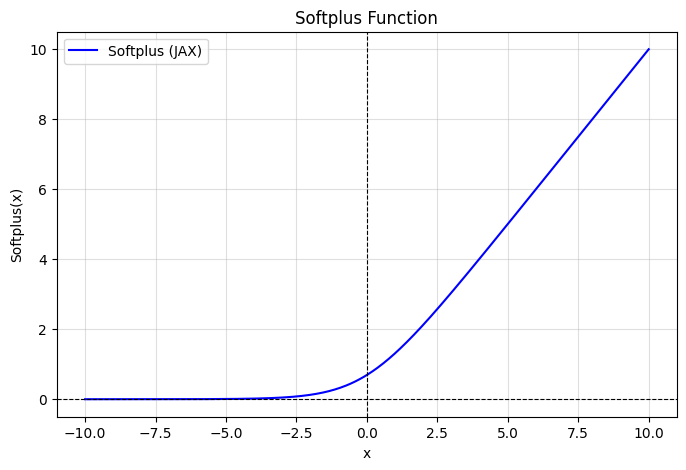

In [93]:
x_values = jnp.linspace(-10, 10, 500)
y_values = soft_plus(x_values)

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label="Softplus (JAX)", color="blue")
plt.title("Softplus Function")
plt.xlabel("x")
plt.ylabel("Softplus(x)")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

In [94]:
@jax.jit
def drug_nn(dosage: float) -> float:
    a1 = dosage * -34.4 + 2.14
    a2 = dosage * -2.52 + 1.29

    b1 = soft_plus(a1) * -1.3
    b2 = soft_plus(a2) * 2.28

    return b1 + b2 + -0.58


In [95]:
print(drug_nn(0.5))
print(drug_nn(0.25))

1.0348318
1.8726988


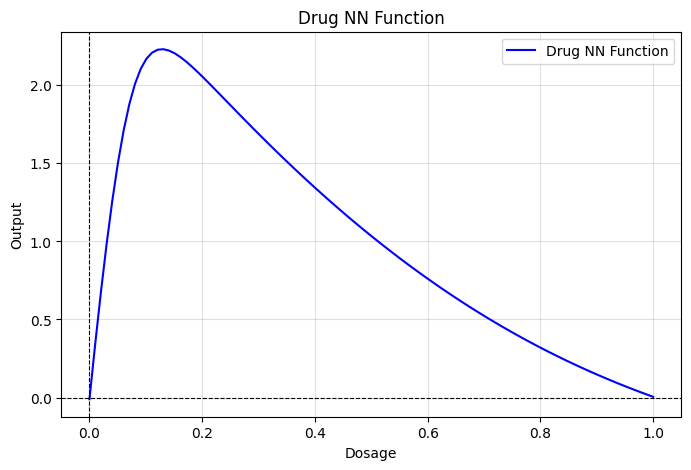

In [96]:
x_values = jnp.linspace(0, 1, 100)
y_values = jax.vmap(drug_nn)(x_values)

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label="Drug NN Function", color="blue")
plt.title("Drug NN Function")
plt.xlabel("Dosage")
plt.ylabel("Output")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

In [97]:
from flax import linen as nn
from jax.typing import ArrayLike

class NN(nn.Module):
    @nn.compact
    def __call__(self, x: ArrayLike) -> ArrayLike:
        x = nn.Dense(features=2)(x)
        x = nn.softplus(x)
        return nn.Dense(1)(x)

model = NN()
variables = {
    'params': {
        'Dense_0': {
            'kernel': jnp.array([[-34.4, -2.52]]),
            'bias': jnp.array([2.14, 1.29]),
        },
        'Dense_1': {
            'kernel': jnp.array([[-1.3], [ 2.28]]),
            'bias': jnp.array([-0.58])
        },
    }
}

In [98]:
print(model.apply(variables, jnp.array([0.5]))[0])
print(model.apply(variables, jnp.array([0.25]))[0])

1.0348318
1.8726993


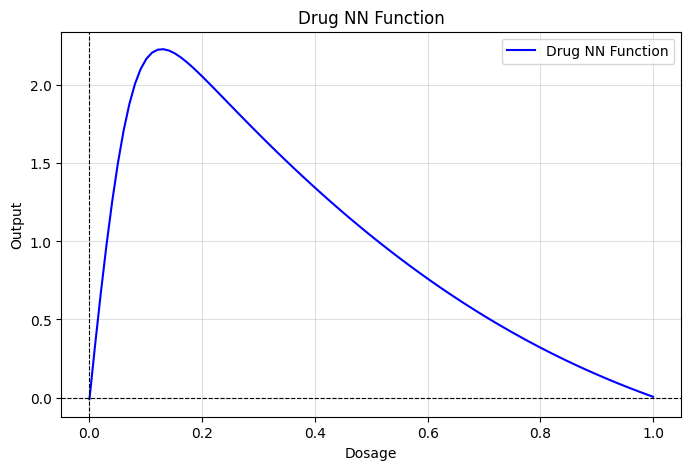

In [99]:
def apply_fn(x):
    return model.apply(variables, jnp.array([x]))[0]

x_values = jnp.linspace(0, 1, 100)
y_values = jax.vmap(apply_fn)(x_values)

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label="Drug NN Function", color="blue")
plt.title("Drug NN Function")
plt.xlabel("Dosage")
plt.ylabel("Output")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.grid(alpha=0.4)
plt.legend()
plt.show()
